<a href="https://colab.research.google.com/github/ajitkumarkp/CV/blob/master/1_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font style="color:rgb(50,120,229)">Overview </font>

1. Image I/O - Read, Write & Display an image
2. Image Properties - color, channels, shape, image structure
3. Creating new images, accessing pixels and region of interest (ROI)

# <font style="color:rgb(50,120,229)">Import Libraries</font>

In [0]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

# <font style="color:rgb(50,120,229)">Reading an Image</font>
OpenCV allows reading different types of images (JPG, PNG, etc). You can load grayscale images, colour images or you can also load images with Alpha channel. It uses the [**`imread`**](https://docs.opencv.org/4.1.0/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56) function which has the following syntax:

### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
retval	=	cv2.imread(filename[, flags]	)
```

It has **2 arguments**:

1. `retval` is the image if it is successfully loaded. Otherwise it is `None`. This may happen if the filename is wrong or the file is corrupt.
2. `Path of the image file`: This can be an **absolute** or **relative** path. This is a **mandatory argument**.
3. `Flags`: These flags are used to read an image in a particular format (for example, grayscale/color/with alpha channel). This is an **optional argument** with a default value of `cv2.IMREAD_COLOR` or `1` which loads the image as a color image.

**Flags**
1. **`cv2.IMREAD_GRAYSCALE`** or **`0`**: Loads image in grayscale mode
2. **`cv2.IMREAD_COLOR`** or **`1`**: Loads a color image. Any transparency of image will be neglected. It is the default flag.
3. **`cv2.IMREAD_UNCHANGED`** or **`-1`**: Loads image as such including alpha channel.


eg: Load this image
<img src="https://www.dropbox.com/s/ed0r779b052o0s2/number_zero.jpg?dl=1" width=100>

[[  1   0   3   0   3   0   3   2   4   2   0]
 [  0   1   0   3   3 253 253   0   0   2   1]
 [  0   0   8   0 249 255 255 253  71   1   5]
 [  3   0   2 251 255   2   0 253 254   0   2]
 [  1   5   0 252   4   0   3   0 255   4   0]
 [  0   0   2 255   0   0   0   3 253   0   4]
 [  0   5   4 249   4   2   0   0 255   1   0]
 [  2   0   0 255   3   0   5   0 254   0   4]
 [  0   0   0 255   1   0   0   3 255   0   0]
 [  1   5   0 252   2   2   2  76 250   7   0]
 [  0   0   5   0 254   0   0 255 254   0   1]
 [  0   8   0   3 253 253 255 250   1   2   1]
 [  2   0   0   0   5   0   4   1   3   0   0]]


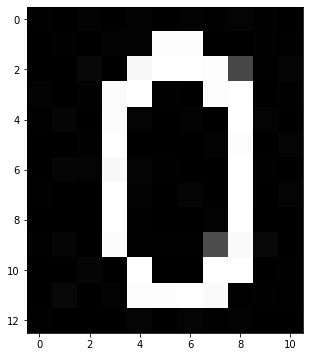

In [16]:
imagePath = "number_zero.jpg"

# Read image in Grayscale format
testImage = cv2.imread(imagePath,0)
print(testImage)
plt.imshow(testImage)

We print the 2-dimensional array to see what the image is. You can make out that the image signifies a `0`. 

## <font style="color:rgb(50,120,229)">Intensity </font>
The values printed above are the intensity values of each pixel. 

**0 means black pixel and as the value increases, it moves towards white. A value of 255 is a white pixel.**

## <font style="color:rgb(50,120,229)">Image Properties</font>

In [12]:
print("Data type = {}\n".format(testImage.dtype))
print("Object type = {}\n".format(type(testImage)))
print("Image Dimensions = {}\n".format(testImage.shape))

Data type = uint8

Object type = <class 'numpy.ndarray'>

Image Dimensions = (13, 11)



1. The datatype of the loaded image is **unsigned int and the depth is 8 bit**
1. The image is just a 2-dimesional numpy array with values ranging from **0 to 255**.
1. The size or resolution is **13x11** which means **height=13 and witdh=11**. In other words, it has **13 rows and 11 columns**.


#### <font style = "color:rgb(200,0,0)"> IMP NOTE</font>
In OpenCV, size is represented as a tuple of `widthxheight` or `#columnsX#rows`. 

But in numpy, the shape method returns size as a tuple of `heightxwidth`.

# <font style="color:rgb(50,120,229)">Manipulating Pixels</font>
So the grayscale image is simply a 2-D array. All operations supported on arrays should be available for working with images. 

## <font style="color:rgb(50,120,229)">Accessing Pixels</font>
In the above testImage, the first pixel has a value of 1. Let us check it.

Since this is a numpy array, we have zero-based indexing and we can access the first element using the index (0,0).

In [0]:
print(testImage[2,7])

253


#### <font style = "color:rgb(200,0,0)">NOTE on indexing</font>

Since matrices are numpy arrays, the first index will be the `row number` and second index is `column number`. 

This leads to a lot of confusion since we think of pixels in terms of `(x,y)` or `(column,row)` coordinates and not `(row,column)`

eg: to access the element at `4th row` and `5th column`, we should use `img[3,4]`. 

## <font style="color:rgb(50,120,229)">Modifying pixel values</font>
Similarly for modifying the value of a pixel, we can simply assign the value to the pixel. 

Let's change the value of the first element and check if the image is updated.

[[255   0   3   0   3   0   3   2   4   2   0]
 [  0   1   0   3   3 253 253   0   0   2   1]
 [  0   0   8   0 249 255 255 253  71   1   5]
 [  3   0   2 251 255   2   0 253 254   0   2]
 [  1   5   0 252   4   0   3   0 255   4   0]
 [  0   0   2 255   0   0   0   3 253   0   4]
 [  0   5   4 249   4   2   0   0 255   1   0]
 [  2   0   0 255   3   0   5   0 254   0   4]
 [  0   0   0 255   1   0   0   3 255   0   0]
 [  1   5   0 252   2   2   2  76 250   7   0]
 [  0   0   5   0 254   0   0 255 254   0   1]
 [  0   8   0   3 253 253 255 250   1   2   1]
 [  2   0   0   0   5   0   4   1   3   0   0]]


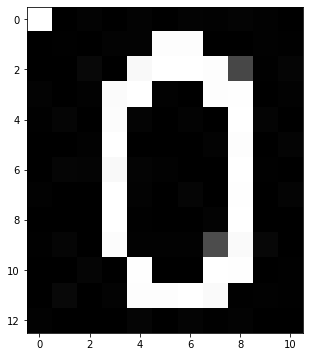

In [15]:
testImage[0,0]=255
print(testImage)
plt.imshow(testImage)

# <font style="color:rgb(50,120,229)">Manipulating Group of Pixels</font>
A region or group of pixels can be accessed using range based indexing available in python. 


## <font style="color:rgb(50,120,229)">Access a region</font>

Original Matrix
[[  1   0   3   0   3   0   3   2   4   2   0]
 [  0   1   0   3   3 253 253   0   0   2   1]
 [  0   0   8   0 249 255 255 253  71   1   5]
 [  3   0   2 251 255   2   0 253 254   0   2]
 [  1   5   0 252   4   0   3   0 255   4   0]
 [  0   0   2 255   0   0   0   3 253   0   4]
 [  0   5   4 249   4   2   0   0 255   1   0]
 [  2   0   0 255   3   0   5   0 254   0   4]
 [  0   0   0 255   1   0   0   3 255   0   0]
 [  1   5   0 252   2   2   2  76 250   7   0]
 [  0   0   5   0 254   0   0 255 254   0   1]
 [  0   8   0   3 253 253 255 250   1   2   1]
 [  2   0   0   0   5   0   4   1   3   0   0]]

Selected Region
[[  3 253 253   0]
 [249 255 255 253]
 [255   2   0 253]]



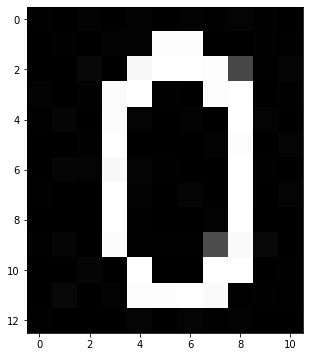

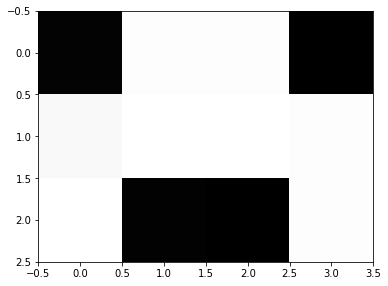

In [21]:
test_roi = testImage[1:4,4:8]
print("Original Matrix\n{}\n".format(testImage))
print("Selected Region\n{}\n".format(test_roi))
plt.imshow(testImage); plt.show()
plt.imshow(test_roi); plt.show()

## <font style="color:rgb(50,120,229)">Modifying a region</font>
Modifying a region is also straightforward. 

Modified Matrix
[[255 255 255 255   3   0   3   2   4   2   0]
 [255 255 255 255   3 253 253   0   0   2   1]
 [  0   0   8   0 249 255 255 253  71   1   5]
 [  3   0   2 251 255   2   0 253 254   0   2]
 [  1   5   0 252   4   0   3   0 255   4   0]
 [  0   0   2 255   0   0   0   3 253   0   4]
 [  0   5   4 249   4   2   0   0 255   1   0]
 [  2   0   0 255   3   0   5   0 254   0   4]
 [  0   0   0 255   1   0   0   3 255   0   0]
 [  1   5   0 252   2   2   2  76 250   7   0]
 [  0   0   5   0 254   0   0 255 254   0   1]
 [  0   8   0   3 253 253 255 250   1   2   1]
 [  2   0   0   0   5   0   4   1   3   0   0]]



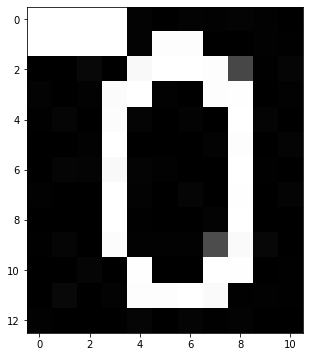

In [32]:
testImage[0:2,0:4] = 255
print("Modified Matrix\n{}\n".format(testImage))
plt.imshow(testImage); plt.show()
# test_float = testImage/255
# print (test_float)
# plt.imshow(test_float); plt.show()

# <font style="color:rgb(50,120,229)">Displaying an Image</font>
There are two functions for displaying an image.

### <font style = "color:rgb(200,0,0)">NOTE </font>

One important thing to note while displaying images is the datatype of the image. The display functions expect the images to be in the following format.
1. If the image is in float data type, then the range of values should be between 0 and 1.
1. If the image is in int data type, then the range of values should be between 0 and 255.

## <font style="color:rgb(50,120,229)">1. Matplotlib's imshow</font>
This function will be used when we want to display the image in Jupyter Notebook.

### <font style = "color:rgb(8,133,37)">Function Syntax</font>

```Python:
None	=	plt.imshow( mat )
```
**Parameters**
- **`mat`** - Image to be displayed.


This function takes many arguments but has only 1 mandatory argument. 

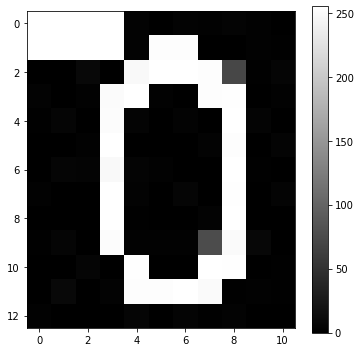

In [33]:
plt.imshow(testImage)
plt.colorbar()

## <font style="color:rgb(50,120,229)">2. OpenCV's imshow</font>
This function will be used when running the Python script from command line.

### <font style = "color:rgb(8,133,37)">Function Syntax</font>

```Python:
None	=	cv2.imshow(	winname, mat	)
```
**Parameters**
- **`winname`** - Name of the window.
- **`mat`** - Image to be displayed.

# <font style="color:rgb(50,120,229)">Additional Display Utility Functions </font>
There are 4 more functions that are present in OpenCV which are commonly used with **`cv2.imshow`** function.

## <font style="color:rgb(50,120,229)">1. cv2.namedWindow</font>

This function is used to create a display window with a specific name. This name is provided as the first argument of this function. The second argument is a flag which decides whether the window can be **resized** (**`cv2.WINDOW_NORMAL`**) or it should be **fixed** to match the image size (**`cv2.WINDOW_AUTOSIZE`** - **Default flag**).

### <font style = "color:rgb(8,133,37)">Function Syntax</font>
[**`Docs`**](https://docs.opencv.org/4.1.0/d7/dfc/group__highgui.html#ga5afdf8410934fd099df85c75b2e0888b)
```Python:
None	=	cv2.namedWindow(	winname[, flags]	)
```
**Parameters**
- **`winname`** - Name of the window in the window caption that may be used as a window identifier.
- **`flags`** - Flags of the window. The supported flags are: (cv::WindowFlags)



## <font style="color:rgb(50,120,229)">2. cv2.waitKey</font>

This function is widely used in image as well as video processing. It is a **keyboard binding function**. Its only argument is time in **milliseconds**. The function waits for specified milliseconds for any keyboard event. If you press any key in that time, the program continues. If **0** is passed, it waits **indefinitely** for a key stroke. It can also be set to detect specific key strokes which can be quite useful in video processing applications, as we will see in later sections.

### <font style = "color:rgb(8,133,37)">Function Syntax</font>
[**`Docs`**](https://docs.opencv.org/4.1.0/d7/dfc/group__highgui.html#ga5628525ad33f52eab17feebcfba38bd7)
```Python:
retval	=	cv2.waitKey(	[, delay]	)
```
**Parameters**
- **`delay`** - Delay in milliseconds. 0 is the special value that means "forever".


## <font style="color:rgb(50,120,229)">3. cv2.destroyWindow</font>

This function is used to destroy or close a particular display window. The name of the window is provided as an argument to this function.

### <font style = "color:rgb(8,133,37)">Function Syntax</font>
[**`Docs`**](https://docs.opencv.org/4.1.0/d7/dfc/group__highgui.html#ga851ccdd6961022d1d5b4c4f255dbab34)
```Python:
None	=	cv2.destroyWindow(	winname	)
```
**Parameters**
- **`winname`** - Name of the window to be destroyed

## <font style="color:rgb(50,120,229)">4. cv2.destroyAllWindows</font>

This function is used to destroy all display windows. This function does not take any arguments.

### <font style = "color:rgb(8,133,37)">Function Syntax</font>
[**`Docs`**](https://docs.opencv.org/4.1.0/d7/dfc/group__highgui.html#ga6b7fc1c1a8960438156912027b38f481)
```Python:
None	=	cv2.destroyAllWindows(		)
```

# <font style="color:rgb(50,120,229)">Write the Image to Disk</font>
In most cases, you would want to save the output of your application. Do this using the [**`imwrite`**](https://docs.opencv.org/4.1.0/d4/da8/group__imgcodecs.html#gabbc7ef1aa2edfaa87772f1202d67e0ce) function.


### <font style = "color:rgb(8,133,37)">Function Syntax</font>
```Python:
retval	=	cv2.imwrite(	filename, img [, params]	)
```
**Parameters**
- **filename** - String providing the relative or absolute path where the image should be saved.
- **img** - Image matrix to be saved.
- **params** - Additional information, like specifying the JPEG compression quality etc. Check the full list [**here**](https://docs.opencv.org/4.1.0/d4/da8/group__imgcodecs.html#ga292d81be8d76901bff7988d18d2b42ac)

In [34]:
cv2.imwrite("test.jpg",testImage)

True

The above function call returned True which indicates that the file was successfuly saved. 

# <font style="color:rgb(50,120,229)">Color Images</font>
We saw how an image is represented as a 2D Matrix. lets see how to load color images and discuss a few important points related to color images. 


In [35]:
# Path of the image to be loaded
imagePath = "musk.jpg"
# Read the image
img = cv2.imread(imagePath)
print("image Dimension ={}".format(img.shape))

image Dimension =(500, 600, 3)


Note : 

1. The image has 3 dimensions. 
1. The third dimension indicates the number of channels in an image. For most images, this number is 3 ( namely R,G,B ). In some cases, there may be an additional channel (called alpha channel) which contains transparency information of the pixels.

# <font style="color:rgb(50,120,229)">Image Channels</font>
color image consists of multiple channels. Each channel itself is a grayscale image. **`The combination of intensity values of the three channels gives the color that is displayed on the screen`**. There are many color spaces used in practice, the most popular color space is the RGB color space.

In OpenCV, the order of channels R, G and B is reverse. i.e. B-G-R

### <font style = "color:rgb(8,133,37)">Display the image</font>

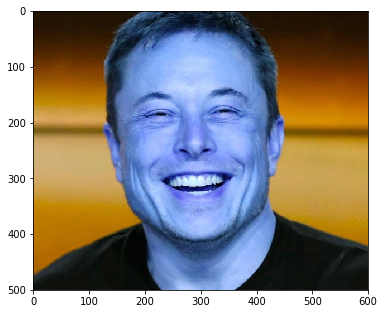

In [0]:
# Display image
plt.imshow(img)

#### <font style = "color:rgb(200,0,0)">Important!</font>

Notice anything weird about the color here? This is because OpenCV uses **BGR** format by default whereas Matplotlib assumes the image to be in **RGB** format. 
This can be fixed by either 

* converting the image to RGB colorspace using **`cv2.cvtColor(img, cv2.COLOR_BGR2RGB)`** or 
* reverse the order of channels - **`plt.imshow(img[:,:,::-1])`** swaps the 1st and 3rd channel.

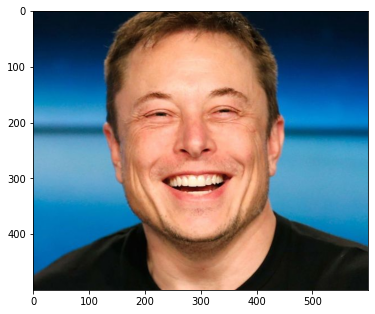

In [36]:
# Convert BGR to RGB colorspace
imgRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)

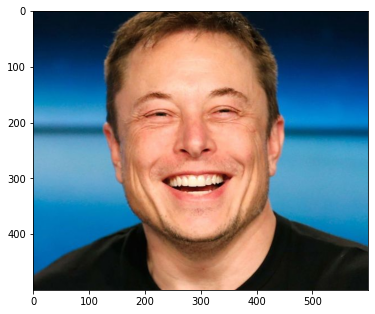

In [39]:
# Or reverse the order of the 3rd dimension i.e. channels
# plt.imshow(img[:,:,::-1])
plt.imshow(img[...,::-1])

Lets see the 3 channels in gray scale 

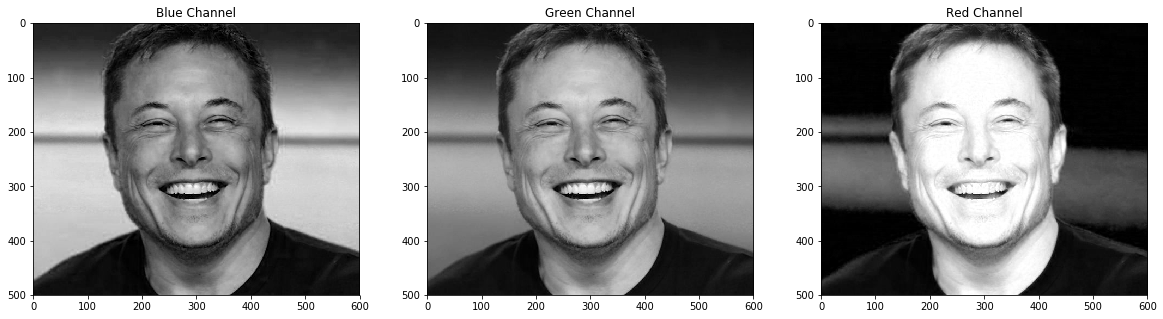

In [0]:
# Show the channels
plt.figure(figsize=[20,5])

plt.subplot(131);plt.imshow(img[:,:,0]);plt.title("Blue Channel");
plt.subplot(132);plt.imshow(img[:,:,1]);plt.title("Green Channel");
plt.subplot(133);plt.imshow(img[:,:,2]);plt.title("Red Channel");

#### <font style = "color:rgb(8,133,37)">Observation </font>
A white pixel means a high intensity value. If you look at the channels closely and compare them with the original image, you should be able to make out the following observations:
1. We can see in the original image that the background is blue in color. Thus, the blue channel is also having higher intensity values for the bakground, whereas the red channel is almost black for the background.
1. The face is reddish in color and thus, the red channel has very high values in the face region, while the other channels are a bit lower.
1. There is a greenish tint in the original image which is also reflected in the Green channel

This kind of information extraction can be very useful if you want to build basic applications which take decisions based on color.

# <font style="color:rgb(50,120,229)">Splitting and Merging channels </font>
An alternate way of working with the individual channels is using split and merge. We can access the channels using an opencv function `cv2.split()` and merge them into a color image using `cv2.merge()`. Let us have a look at how it is done.

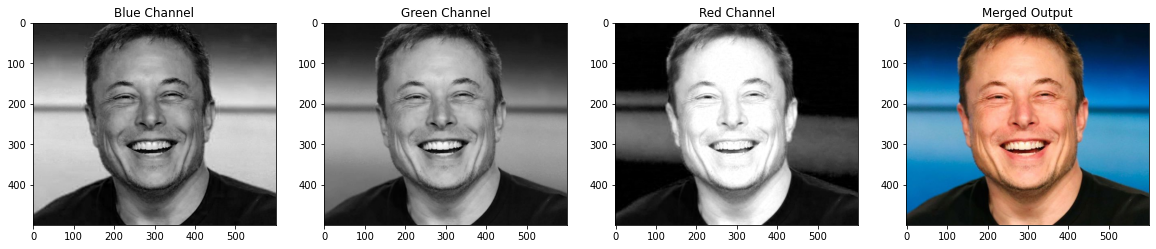

In [45]:
# Split the image into the B,G,R components
b,g,r = cv2.split(img)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(b);plt.title("Blue Channel");
plt.subplot(142);plt.imshow(g);plt.title("Green Channel");
plt.subplot(143);plt.imshow(r);plt.title("Red Channel");

# Merge the individual channels into a BGR image
imgMerged = cv2.merge((b,g,r))
# Show the merged output
plt.subplot(144);plt.imshow(imgMerged[:,:,::-1]);plt.title("Merged Output");

# <font style="color:rgb(50,120,229)">Manipulating Color Pixels</font>

We saw how to access and modify individual pixels for a grayscale image. The same does not hold for color images. As we discussed, the color image has 3 channels, when we access a pixel, we get a tuple/array of values from the 3 channels. Similarly, we need to specify a tuple for changing the values in the color image.

Let us load the grayscale image in color. Note that it still looks the same( black and white ) since all the channels contain the same values.

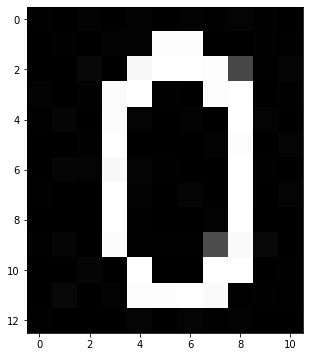

In [47]:
imagePath = "number_zero.jpg"
testImage = cv2.imread(imagePath,1)
plt.imshow(testImage)

## <font style="color:rgb(50,120,229)">Access Color pixel</font>

In [48]:
print(testImage[0,0])

[1 1 1]


You can see that the intensity value now has 3 elements - one for each channel

## <font style="color:rgb(50,120,229)">Modify Pixels</font>

Let us change the pixel at 
- location [0,0] to Yellow ( It is a mixture of Red and Green )
- location [1,1] to Cyan ( It is a mixture of Blue and Green )
- location [2,2] to Magenta ( It is a mixture of Blue and Red )

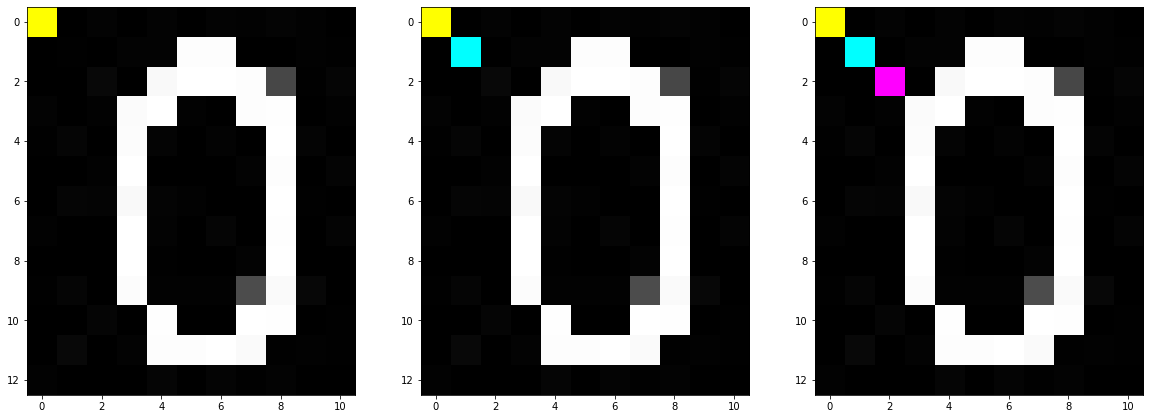

In [49]:
plt.figure(figsize=[20,20])

testImage[0,0] = (0,255,255) #BGR
plt.subplot(131);plt.imshow(testImage[:,:,::-1]) # show as RGB

testImage[1,1] = (255,255,0)
plt.subplot(132);plt.imshow(testImage[:,:,::-1])

testImage[2,2] = (255,0,255)

plt.subplot(133);plt.imshow(testImage[:,:,::-1])

## <font style="color:rgb(50,120,229)">Modify Region of Interest</font>
Similar to above, we will change the pixels at specific regions as given below. The code is self-explanatory.

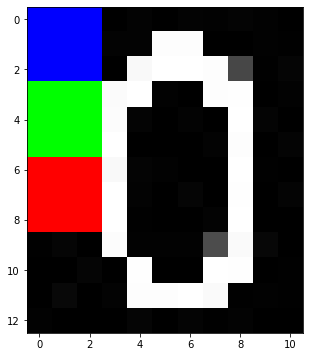

In [50]:
testImage[0:3,0:3] = (255,0,0)
testImage[3:6,0:3] = (0,255,0)
testImage[6:9,0:3] = (0,0,255)

plt.imshow(testImage[:,:,::-1])

# <font style="color:rgb(50,120,229)">Images with Alpha Channel</font>

In images with an alpha channel, each pixel not only has a color value, but also has a numerical transparency value ( between 0 to 255) that defines what will happen when the pixel is placed over another pixel.

There are 4 channels, i.e. 3 color channels and 1 alpha channel which indicates the transparency.

image Dimension =(608, 640, 4)


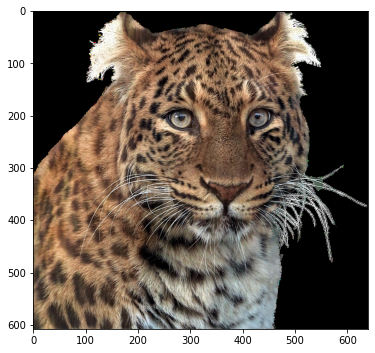

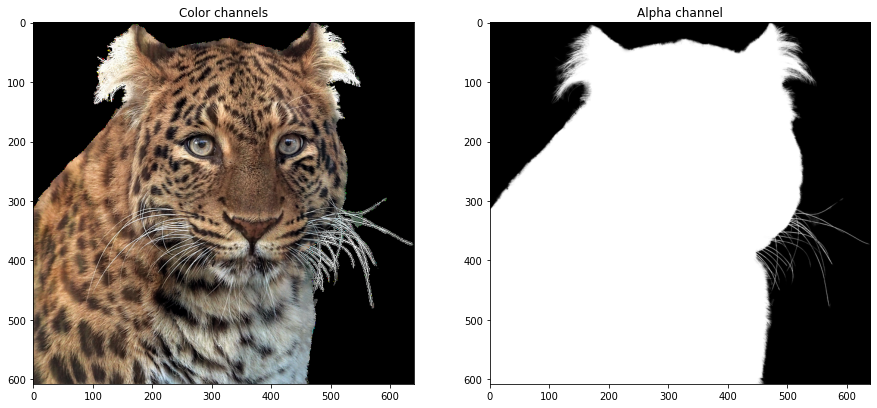

In [54]:
# Path of the PNG image to be loaded
imagePath = "panther.png"

# Read the image
# Note that we are passing flag = -1 while reading the image ( it will read the image as is)
imgPNG = cv2.imread(imagePath,-1)
print("image Dimension ={}".format(imgPNG.shape))

imgRGB = cv2.cvtColor(imgPNG,cv2.COLOR_BGRA2RGB)
plt.imshow(imgRGB)

#First 3 channels will be combined to form BGR image
#Mask is the alpha channel of the original image
imgBGR = imgPNG[:,:,0:3]
imgMask = imgPNG[:,:,3]
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(imgBGR[:,:,::-1]);plt.title('Color channels');
plt.subplot(122);plt.imshow(imgMask,cmap='gray');plt.title('Alpha channel');

The alpha mask is basically a very accurate segmentation of the image. It is useful for creating overlays.